[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shetg\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\shetg\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Columns in dataset: Index(['tweet_id', 'label', 'tweet_text'], dtype='object')
Dataset shape: (6000, 3)
Using text column: tweet_text

Sentiment Distribution (VADER):
sentiment
Positive    2780
Neutral     1985
Negative    1235
Name: count, dtype: int64


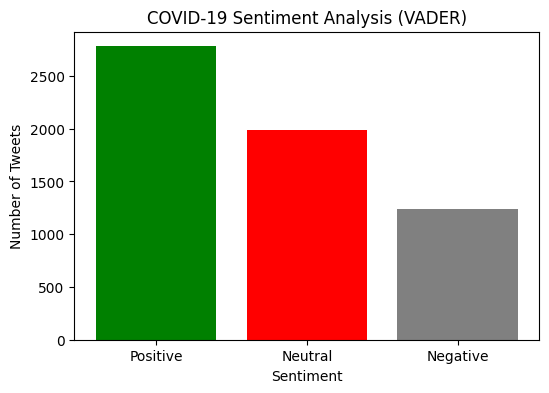

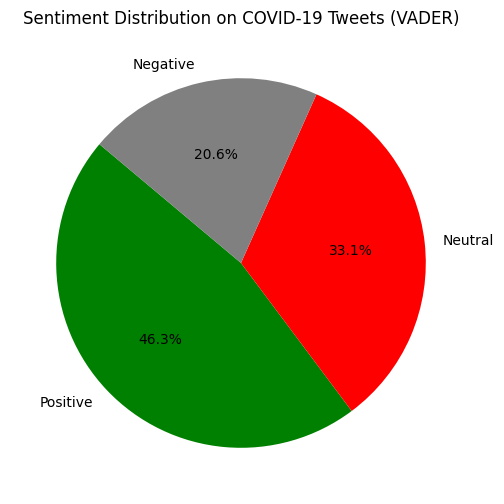


Sentiment analysis completed with VADER! Results saved to covid19_tweets_sentiment.csv


In [1]:
import pandas as pd
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

# Download required NLTK data
nltk.download('stopwords')
nltk.download('vader_lexicon')

# Load Dataset
df = pd.read_csv(r"C:\Users\shetg\OneDrive\Desktop\Data Science\Q12-covid19_sentiment_analysis\covid-19_tweets.csv", encoding='cp1252')
print('Columns in dataset:', df.columns)
print('Dataset shape:', df.shape)

# Find the text column automatically
text_column = 'tweet_text'
print('Using text column:', text_column)

# Clean the Text
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)  # remove links
    text = re.sub(r'@\w+|\#','', text)  # remove mentions/hashtags
    text = text.translate(str.maketrans('', '', string.punctuation))  # remove punctuation
    words = text.split()
    words = [w for w in words if w not in stop_words]  # remove stopwords
    return ' '.join(words)

df['clean_text'] = df[text_column].apply(clean_text)

# Sentiment Analysis (VADER)
sia = SentimentIntensityAnalyzer()

def get_vader_sentiment(text):
    score = sia.polarity_scores(text)
    compound = score['compound']  # overall sentiment score
    if compound > 0.05:
        return 'Positive'
    elif compound < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment'] = df['clean_text'].apply(get_vader_sentiment)

# Count & Visualization
sentiment_counts = df['sentiment'].value_counts()
print('\nSentiment Distribution (VADER):')
print(sentiment_counts)
# Bar Plot
plt.figure(figsize=(6,4))
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['green','red','gray'])
plt.title("COVID-19 Sentiment Analysis (VADER)")
plt.xlabel("Sentiment")
plt.ylabel("Number of Tweets")
plt.show()

# Pie Chart
plt.figure(figsize=(6,6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140,
        colors=['green','red','gray'])
plt.title("Sentiment Distribution on COVID-19 Tweets (VADER)")
plt.show()
# Save Results
df.to_csv(r"C:\Users\shetg\OneDrive\Desktop\Data Science\Q12-covid19_sentiment_analysis\covid19_tweets_sentiment.csv", index=False)
print('\nSentiment analysis completed with VADER! Results saved to covid19_tweets_sentiment.csv')
